In [21]:
import glob
import pandas as pd
import pylab as pl
%pylab inline
from scipy import signal

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
#Loading photos taken with shutter frequency 120, 119.75, 119, 100, 50 and 10 Hz; and camera frequency of 4 and 3.5hz 

shutter = [120, 11975, 119, 100, 50, 10]
photo_files4 = {}
photo_files35 = {}

for i in shutter:
    path4 = '/scratch/share/fbianco/LEDtest/s%shz_c4hz*.raw' % i
    photo_files4[str(i)] = glob.glob(path4)
    path35 = '/scratch/share/fbianco/LEDtest/s%shz_c35hz*.raw' % i
    photo_files35[str(i)] = glob.glob(path35)

In [4]:
#Converting series into Numpy arrays

photo_arrays4 = {}
photo_arrays35 = {}

for key, value in photo_files4.iteritems():
    photo_arrays4[key] = np.array(value)[np.argsort(value)] 
    
for key, value in photo_files35.iteritems():
    photo_arrays35[key] = np.array(value)[np.argsort(value)] 

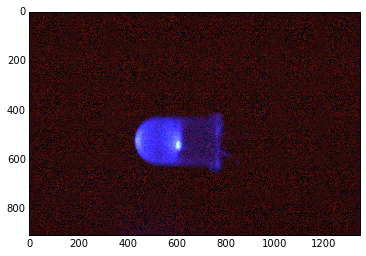

In [5]:
#Testing several configurations to find the right nrow/ncol

nrow = 908
ncol = 1344
nband = 3

pl.figure()
pl.imshow(np.fromfile(photo_arrays35['11975'][250], dtype=np.uint8).reshape(nrow, ncol, nband))

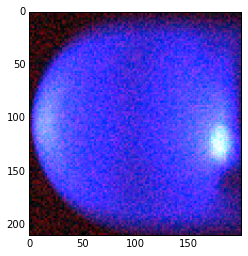

In [6]:
#Testing image size so as to crop "non-lamp" parts 

imshow(np.fromfile(photo_arrays35['11975'][250],dtype=np.uint8).reshape(nrow,ncol,nband)[420:630,425:625])

In [7]:
#Resizing all series
#Excluding 119/3.5 Hz setting as it is crashing (possibly because of missing photos)

photo_resized4 = {}
photo_resized35 = {}

for key, value in photo_arrays4.iteritems():
    photo_resized4[key] = np.zeros(len(value))

for key, value in photo_arrays35.iteritems():
    if key != '119':
        photo_resized35[key] = np.zeros(len(value))

for r in photo_resized4:
    for i,f in enumerate(photo_arrays4[r]):
        photo_resized4[r][i] = sum(np.fromfile(f,dtype=np.uint8).reshape(nrow,ncol,nband)[420:630,425:625])        
        
for r in photo_resized35:
    for i,f in enumerate(photo_arrays35[r]):
        photo_resized35[r][i] = sum(np.fromfile(f,dtype=np.uint8).reshape(nrow,ncol,nband)[420:630,425:625])

In [8]:
#Creating dictionaries for flux

flux4 = {}
flux35 = {}

for key, value in photo_resized4.iteritems():
    flux4[key] = value/value.mean()

for key, value in photo_resized35.iteritems():
    flux35[key] = value/value.mean()

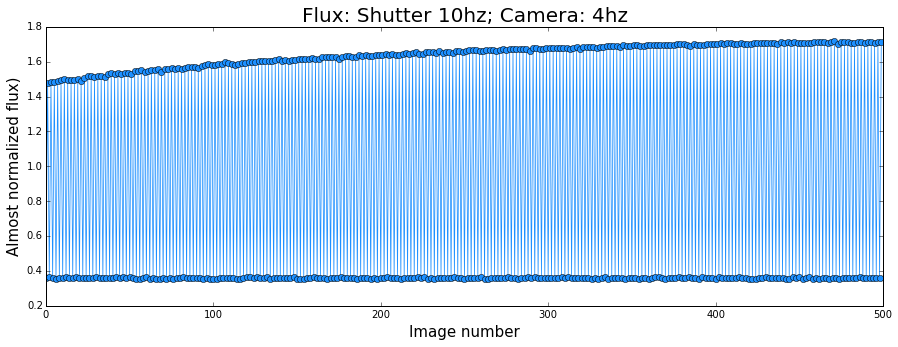

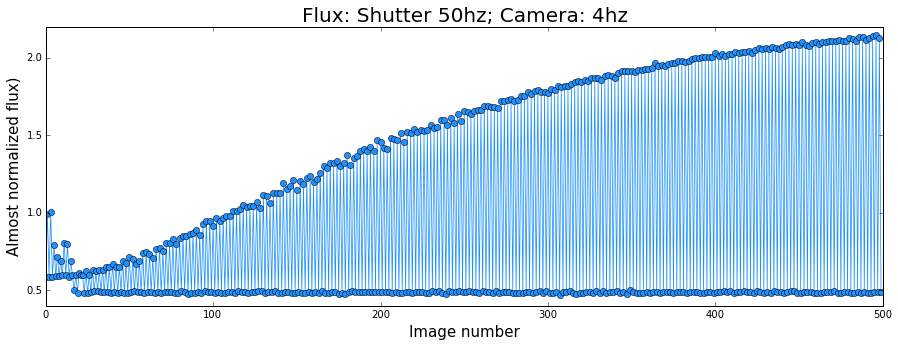

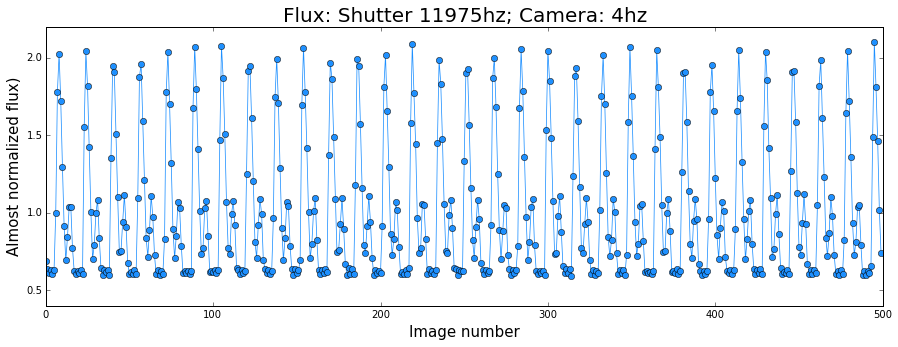

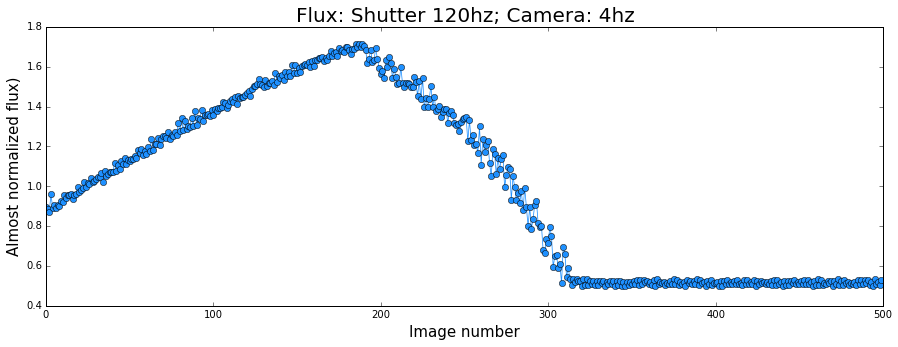

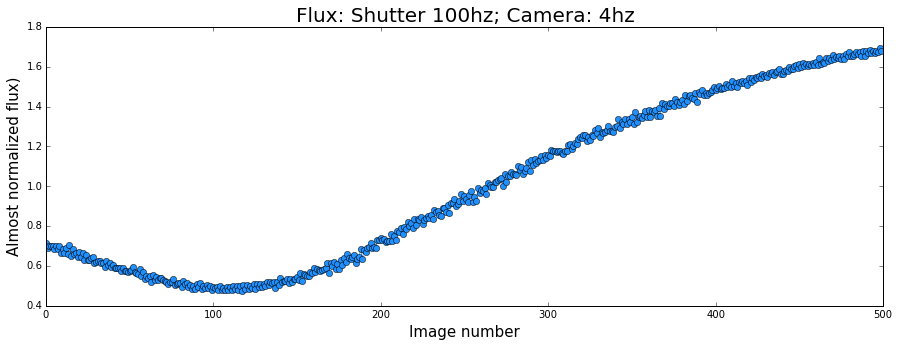

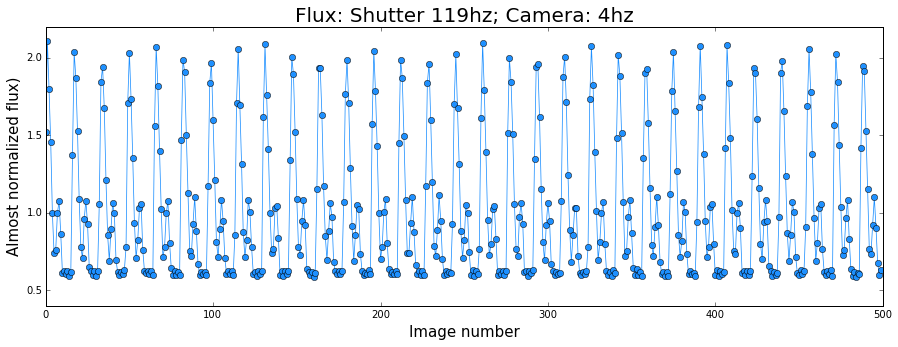

In [9]:
#Plotting the flux (Camera: 4hz)

for key, value in flux4.iteritems():
    pl.figure(figsize=(15,5))
    pl.plot(value, '-', color='dodgerblue', linewidth=0.75)
    pl.plot(value, 'o', color='dodgerblue')
    pl.xlabel("Image number", fontsize=15)
    pl.ylabel("Almost normalized flux)", fontsize=15)
    pl.title('Flux: Shutter '+key+'hz; Camera: 4hz', fontsize=20)
    pl.show()

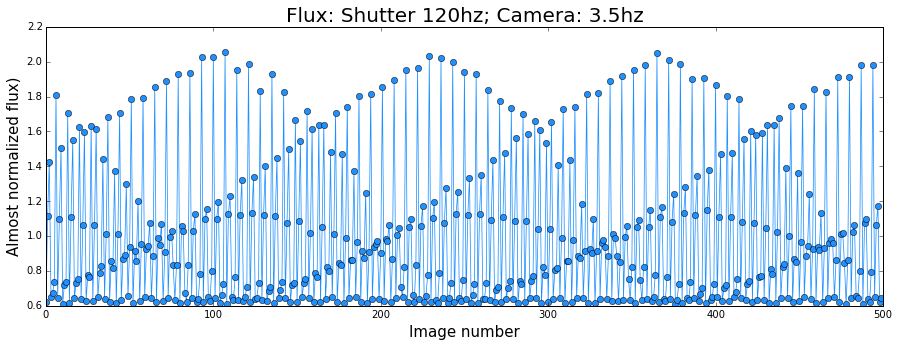

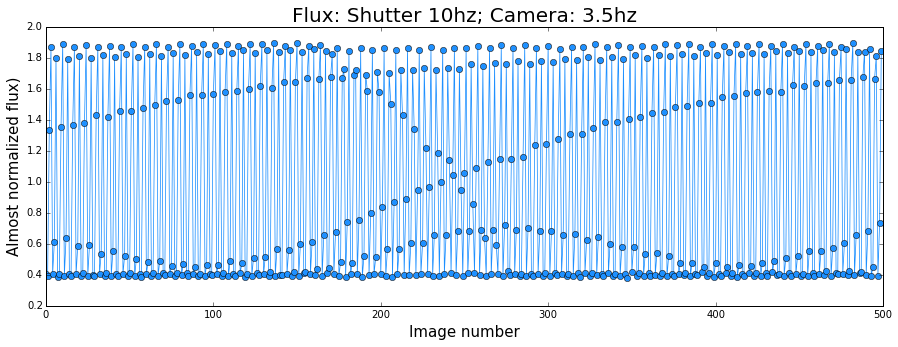

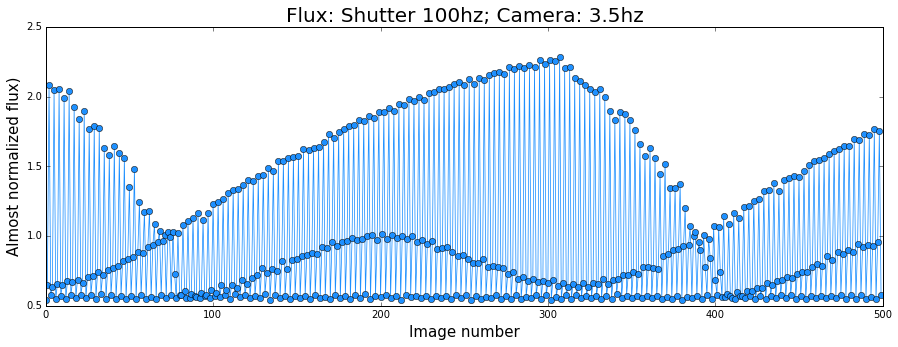

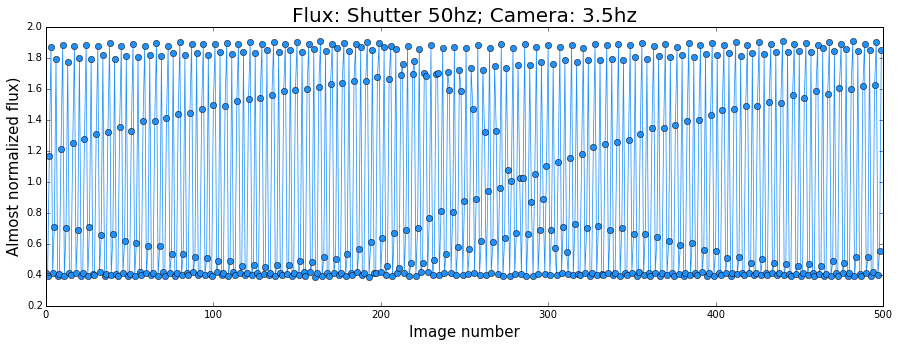

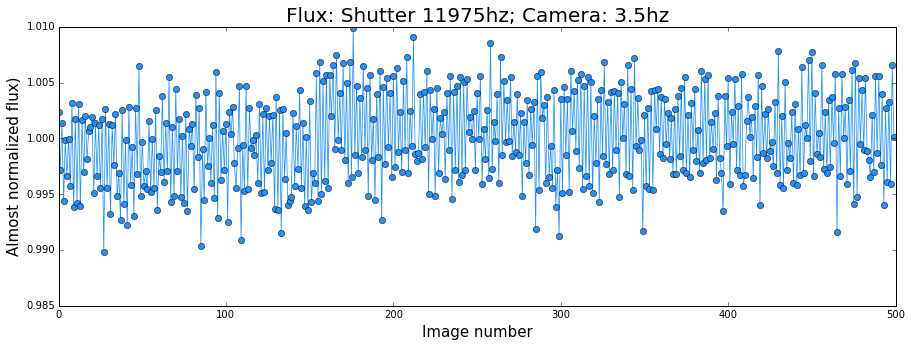

In [10]:
#Plotting the flux (Camera: 3.5hz)

for key, value in flux35.iteritems():
    pl.figure(figsize=(15,5))
    pl.plot(value, '-', color='dodgerblue', linewidth=0.75)
    pl.plot(value, 'o', color='dodgerblue')
    pl.xlabel("Image number", fontsize=15)
    pl.ylabel("Almost normalized flux)", fontsize=15)
    pl.title('Flux: Shutter '+key+'hz; Camera: 3.5hz', fontsize=20)
    pl.show()

In [11]:
#Calculating the runtime

runtime4 = {}
runtime35 = {}

for key, value in photo_resized4.iteritems():
    runtime4[key] = np.arange(len(value))/4

for key, value in photo_resized35.iteritems():
    runtime35[key] = np.arange(len(value))/3.5

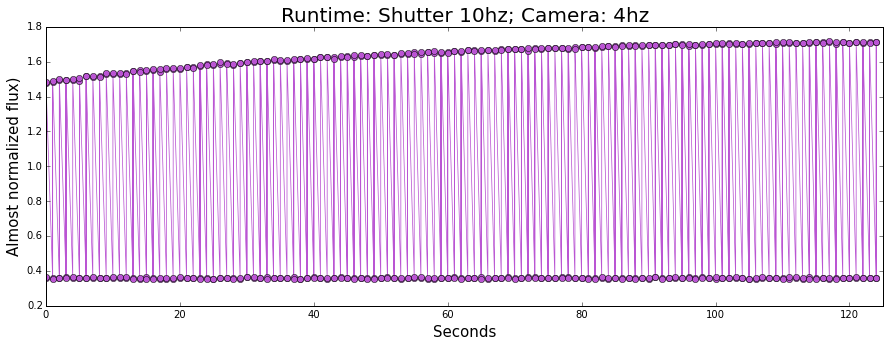

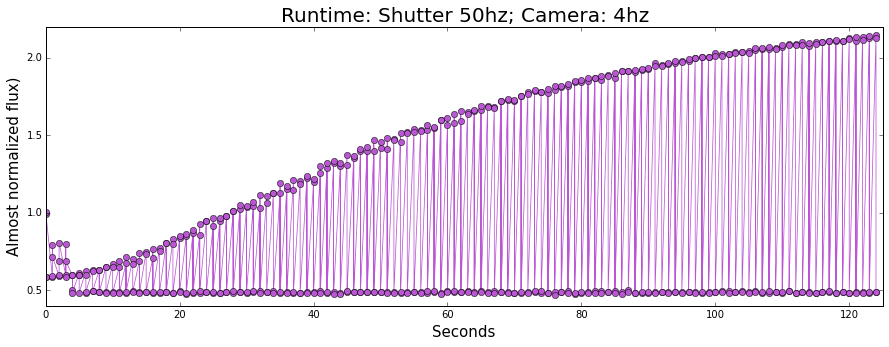

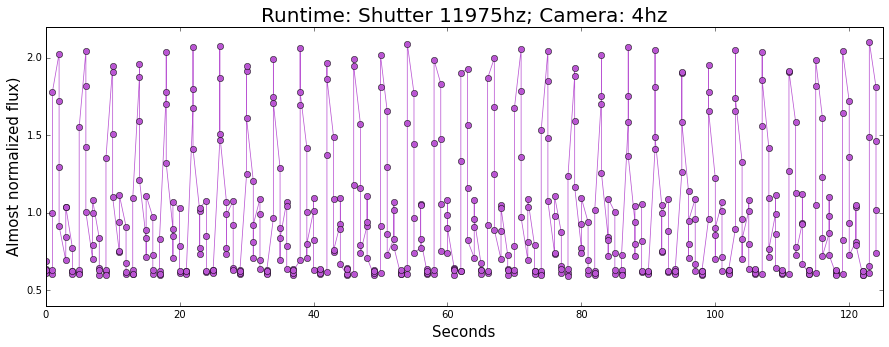

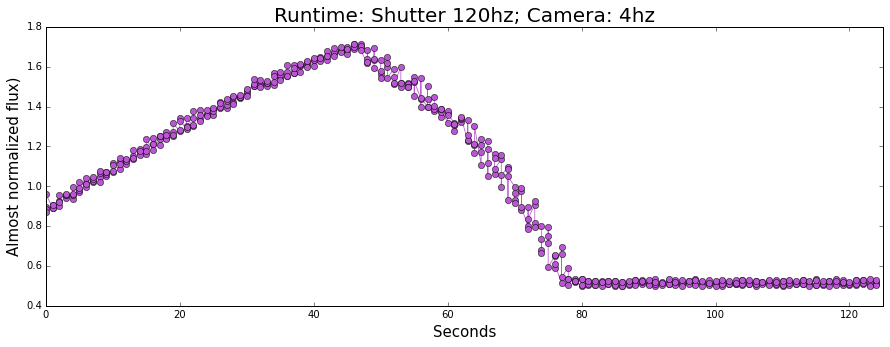

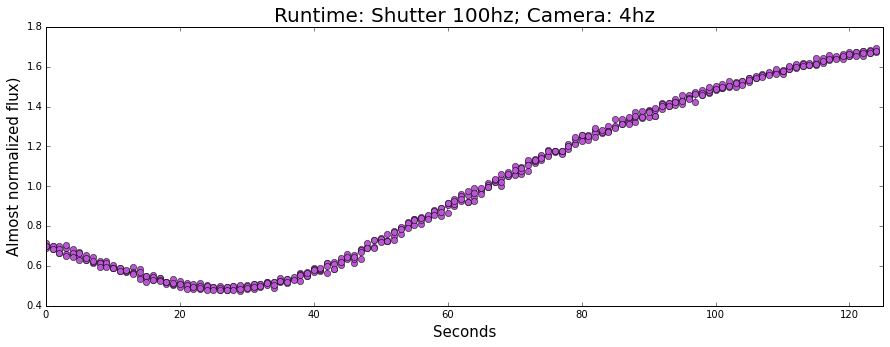

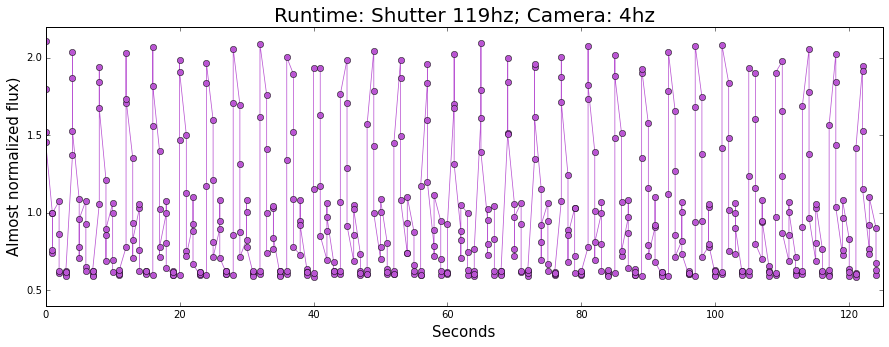

In [12]:
#Plotting the runtime (Camera: 4hz)

for key, value in runtime4.iteritems():
    pl.figure(figsize=(15,5))
    pl.plot(value, flux4[key], '-', color='mediumorchid', linewidth=0.75)
    pl.plot(value, flux4[key], 'o', color='mediumorchid')
    pl.xlabel("Seconds", fontsize=15)
    pl.ylabel("Almost normalized flux)", fontsize=15)
    pl.title('Runtime: Shutter '+key+'hz; Camera: 4hz', fontsize=20)
    xlim(0,125)
    pl.show()    

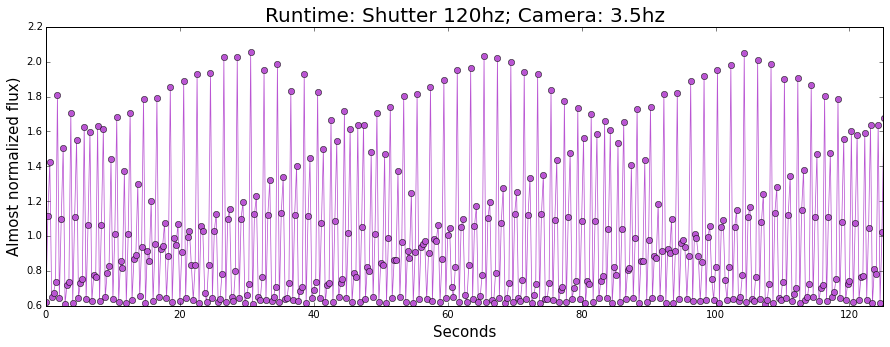

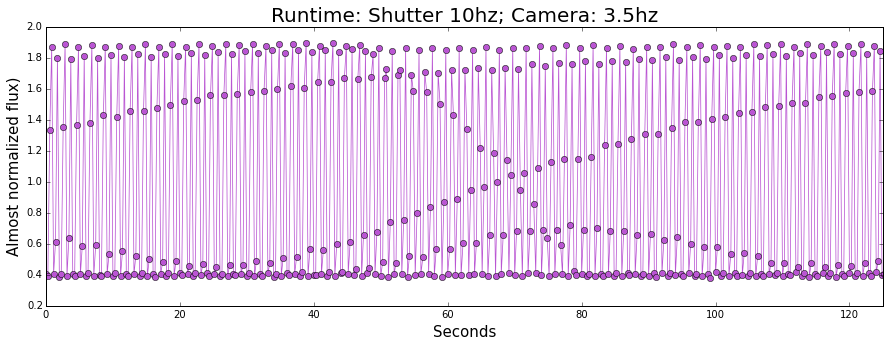

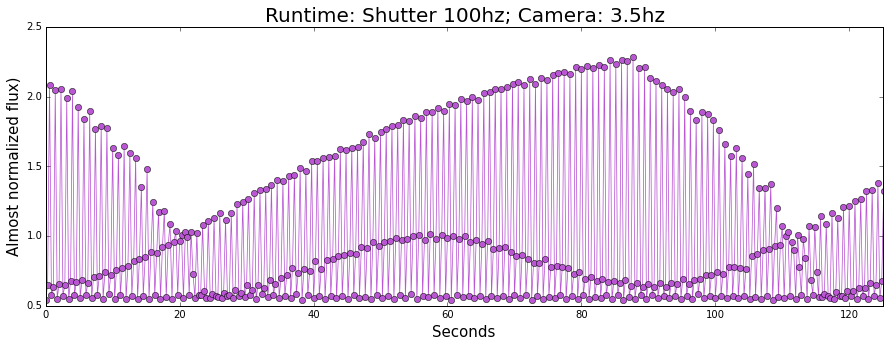

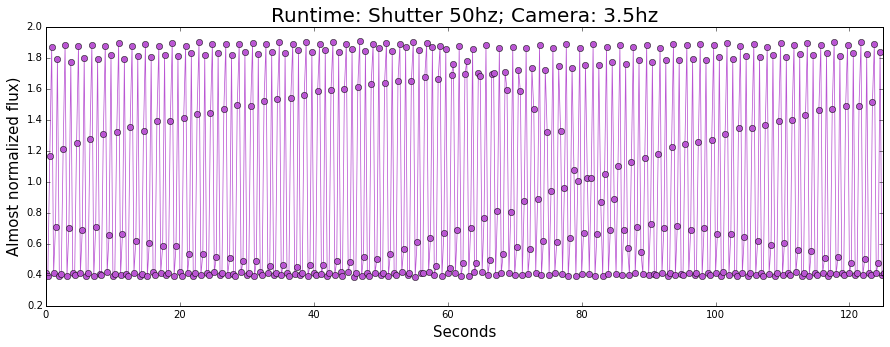

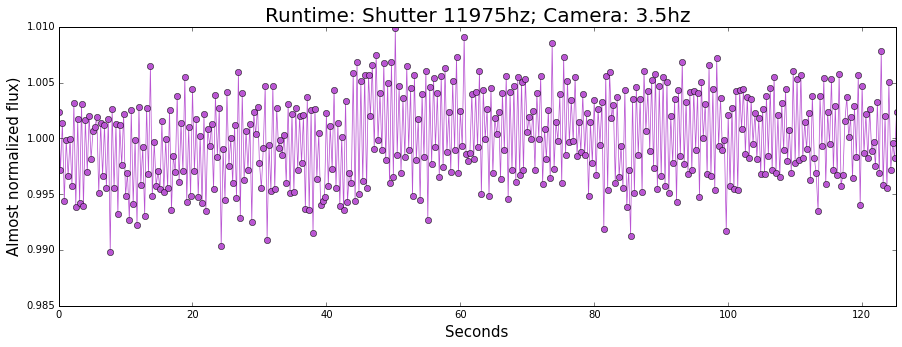

In [13]:
#Plotting the runtime (Camera: 3.5hz)

for key, value in runtime35.iteritems():
    pl.figure(figsize=(15,5))
    pl.plot(value, flux35[key], '-', color='mediumorchid', linewidth=0.75)
    pl.plot(value, flux35[key], 'o', color='mediumorchid')
    pl.xlabel("Seconds", fontsize=15)
    pl.ylabel("Almost normalized flux)", fontsize=15)
    pl.title('Runtime: Shutter '+key+'hz; Camera: 3.5hz', fontsize=20)
    xlim(0,125)
    pl.show()    

In [14]:
#I'm trying to find the flux that would be expected given the camera/shutter settings
#I'm dividing the analysis into the 2 camera speeds
#At the highest camera speed (4hz), the 500 photos take 125 sec to be taken (1/(4)*500), and a photo is taken every 250ms
#At the lowest camera speed (3.5hz), the 500 photos take 143 sec to be taken (1/(3.5)*500), and a photo is taken every 286ms
#Using a time of 150,000ms

cam4 = np.zeros(150000)

for i in range(150000):
    if i%250 == 0:
        cam4[i] = 1
    else:
        cam4[i] = 0
        
cam35 = np.zeros(150000)

for i in range(150000):
    if i%286 == 0:
        cam35[i] = 1
    else:
        cam35[i] = 0

(-1.1, 1.1)

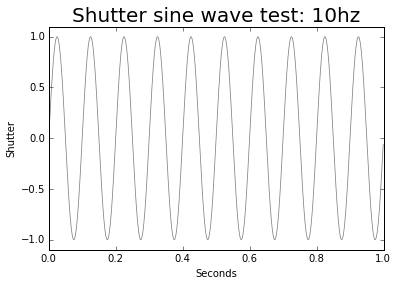

In [24]:
#I'm trying to simulate sine waves for the shutter

sine = {}

time = np.linspace(0, 150, 150*1000)

for i in shutter:
    sine[i] = np.sin(2*np.pi*time*i)

#Visualizing it for 10hz: 10 cycles in one sec; seems ok

pl.plot(time[0:1000], sine[10][0:1000], '-', color='grey', linewidth = 0.75)
pl.title('Shutter sine wave test: 10hz', fontsize=20)
pl.xlabel('Seconds')
pl.ylabel('Shutter')
ylim(-1.1, 1.1)

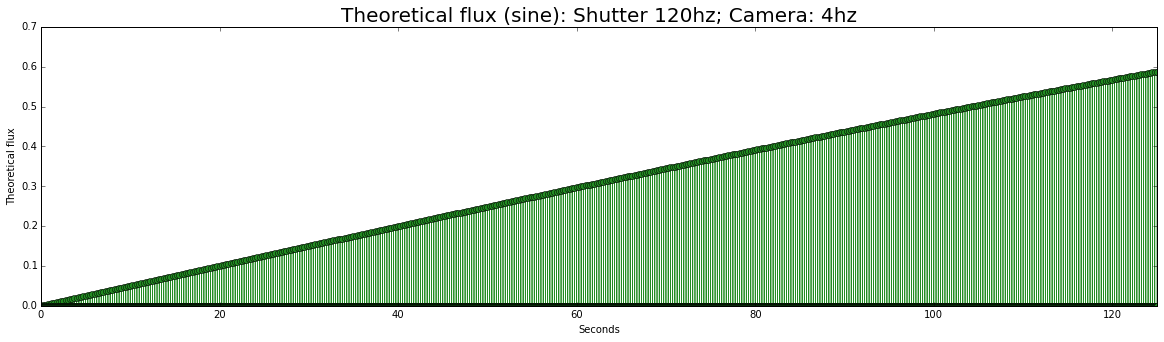

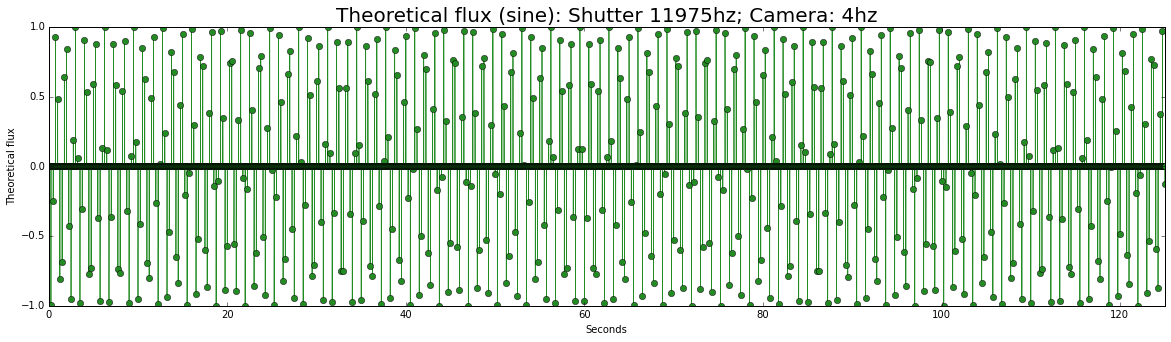

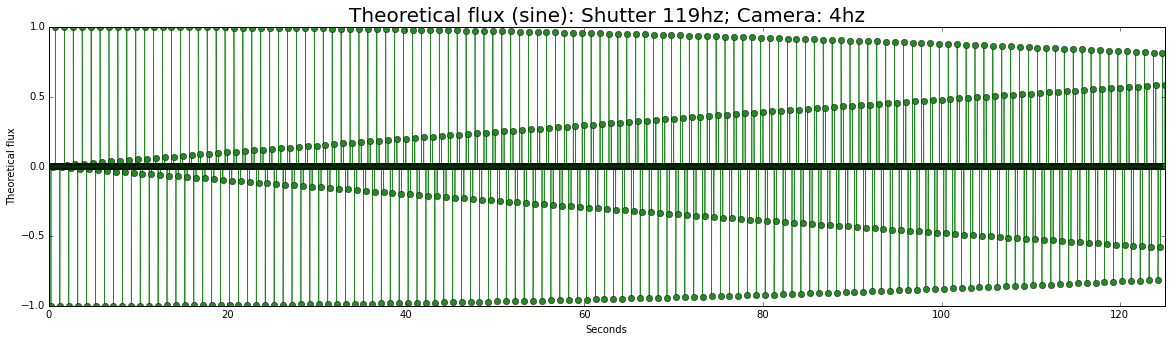

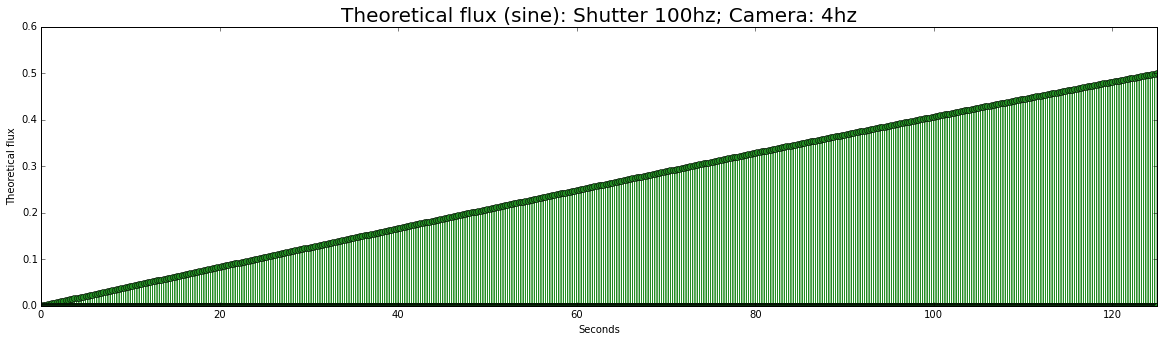

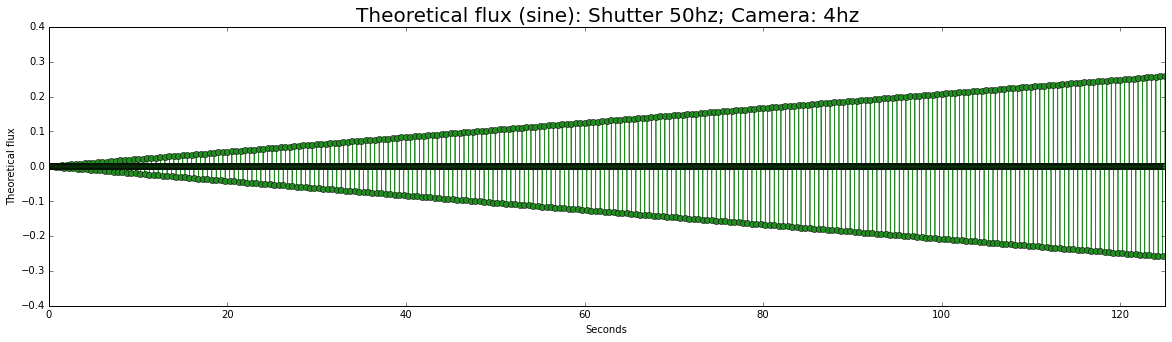

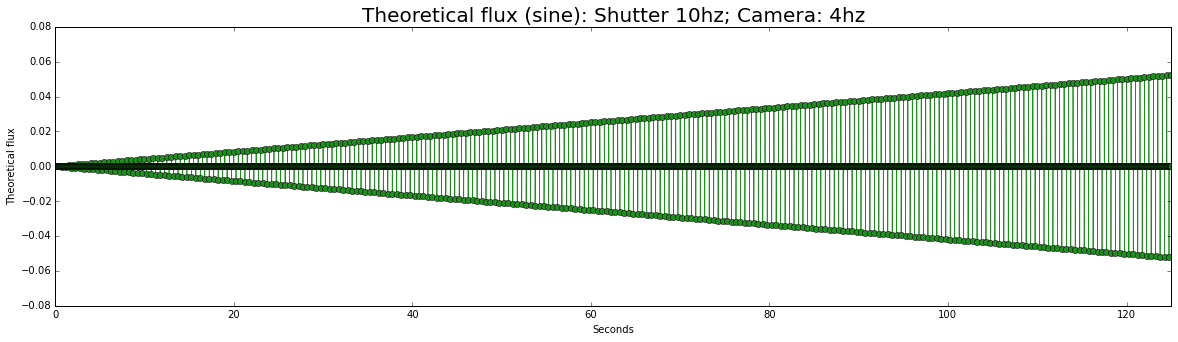

In [48]:
#Plotting the "theoretical" fluxes for camera speed of 4hz
#This flux equals the points in which the camera "meets" the shutter wave

inter_sn4 = {}

for i in shutter:
    inter_sn4[i] = sine[i]*cam4
    pl.figure(figsize(20, 5))
    pl.plot(time, inter_sn4[i], '-', color='forestgreen', linewidth = 0.75)
    pl.plot(time, inter_sn4[i], 'o', color='forestgreen', linewidth = 0.75)
    xlim(0, 125)
    pl.title('Theoretical flux (sine): Shutter '+str(i)+'hz; Camera: 4hz', fontsize=20)
    pl.xlabel('Seconds')
    pl.ylabel('Theoretical flux')

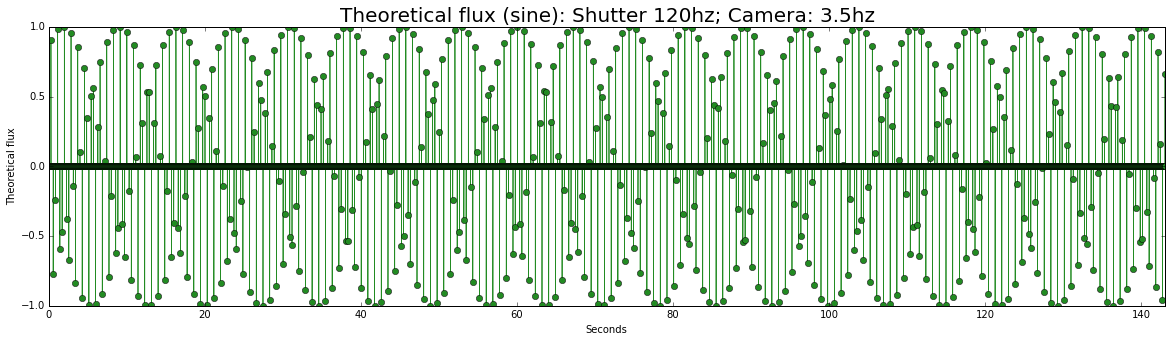

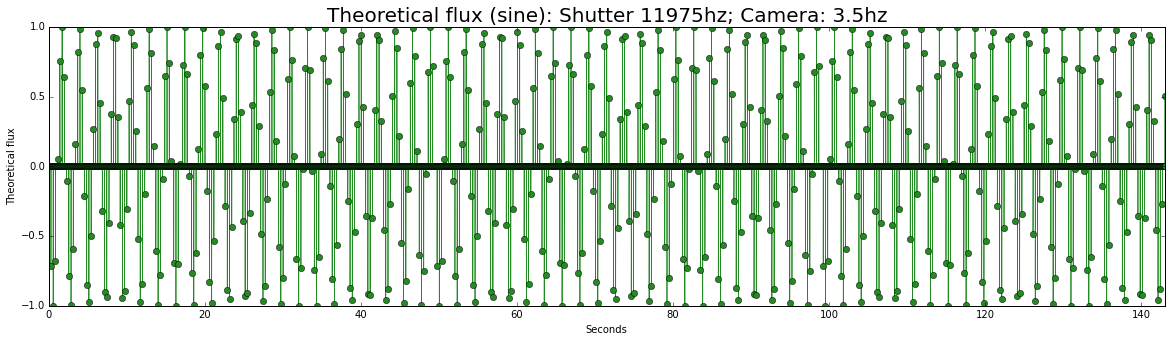

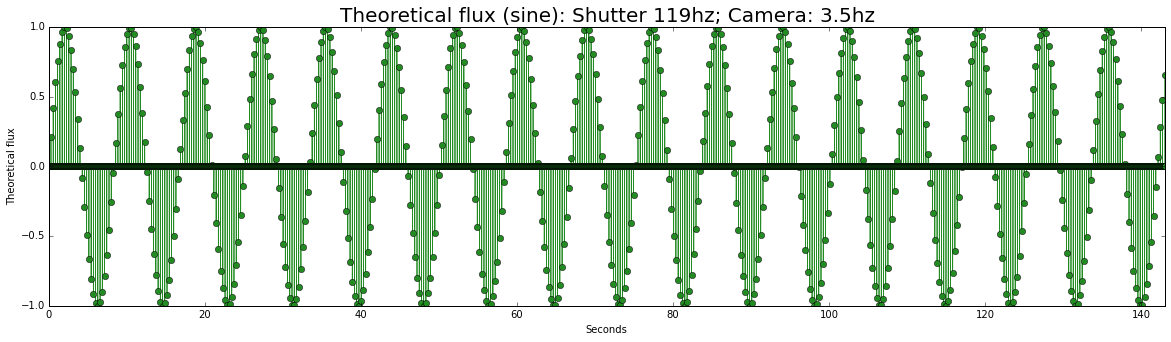

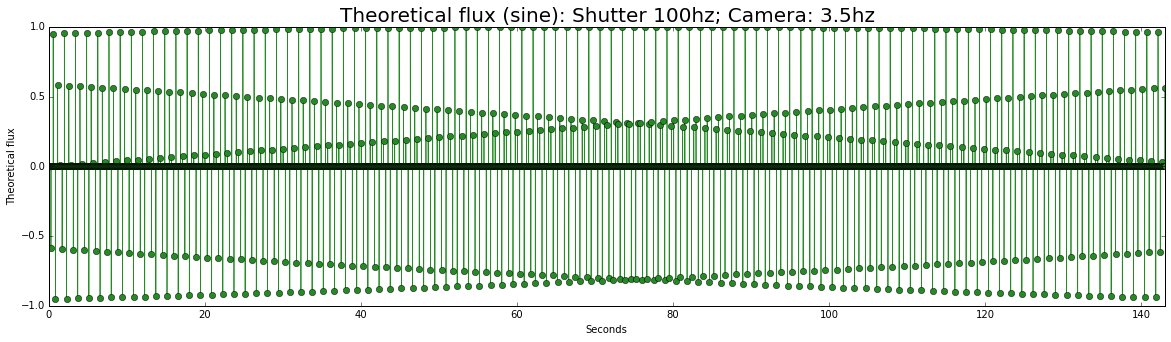

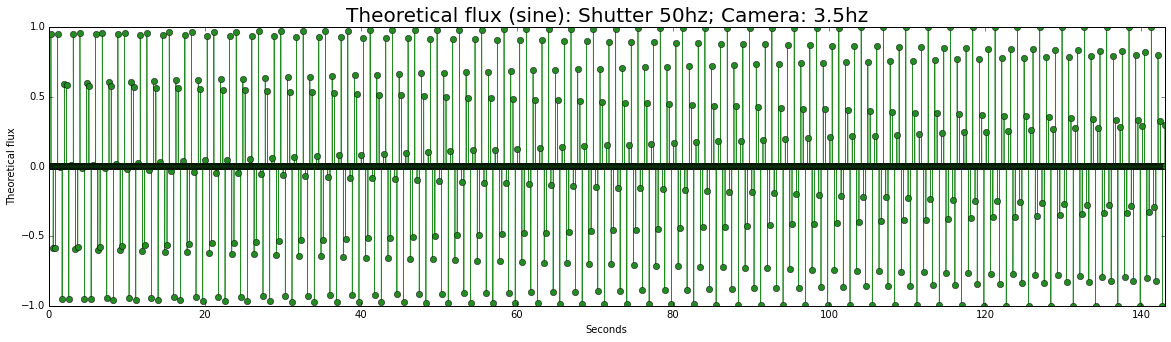

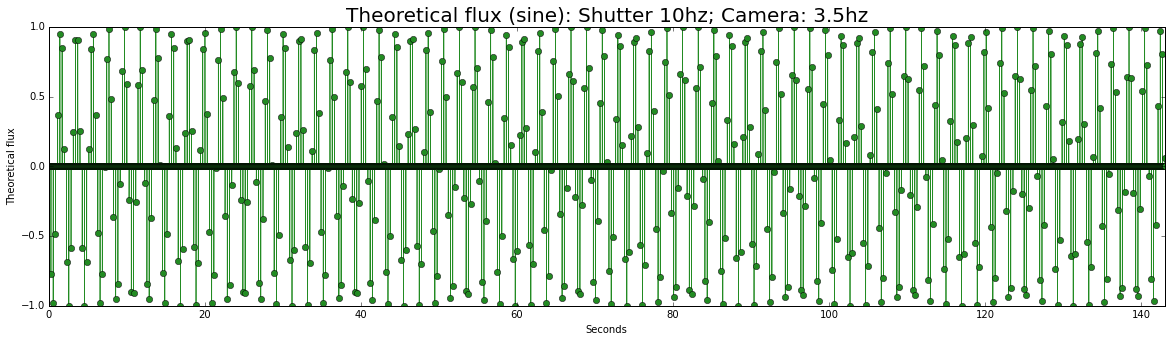

In [47]:
#Plotting the "theoretical" fluxes for camera speed of 3.5hz
#This flux equals the points in which the camera "meets" the shutter wave

inter_sn35 = {}

for i in shutter:
    inter_sn35[i] = sine[i]*cam35
    pl.figure(figsize(20, 5))
    pl.plot(time, inter_sn35[i], '-', color='forestgreen', linewidth = 0.75)
    pl.plot(time, inter_sn35[i], 'o', color='forestgreen', linewidth = 0.75)
    xlim(0, 143)
    pl.title('Theoretical flux (sine): Shutter '+str(i)+'hz; Camera: 3.5hz', fontsize=20)
    pl.xlabel('Seconds')
    pl.ylabel('Theoretical flux')

(-1.1, 1.1)

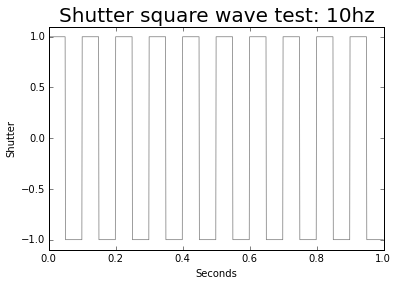

In [26]:
#I'm now trying to simulate square waves for the shutter

square = {}

time = np.linspace(0, 150, 150*1000)

for i in shutter:
    square[i] = signal.square(2*np.pi*time*i)

#Visualizing it for 10hz: 10 cycles in one sec; seems ok

pl.plot(time[0:1000], square[10][0:1000], '-', color='grey', linewidth = 0.75)
pl.title('Shutter square wave test: 10hz', fontsize=20)
pl.xlabel('Seconds')
pl.ylabel('Shutter')
ylim(-1.1, 1.1)

In [44]:
print square[10][250]
print cam4[250]
print inter4[10][250]

-1.0
1.0
-0.000104720453063


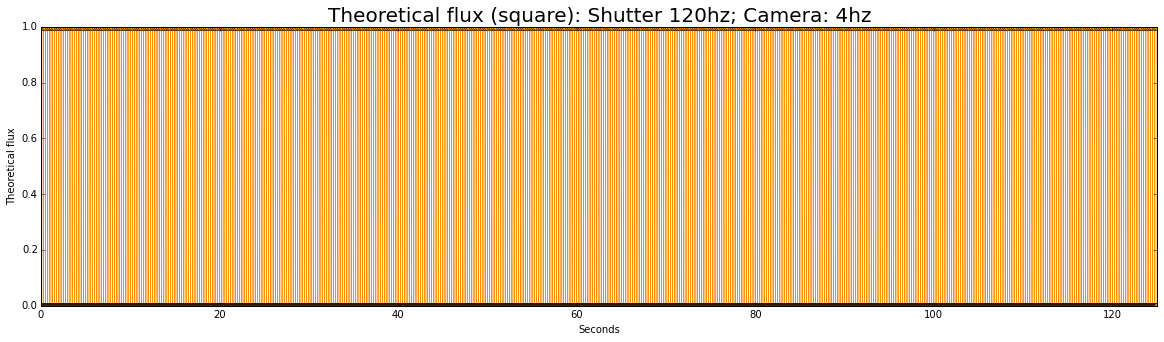

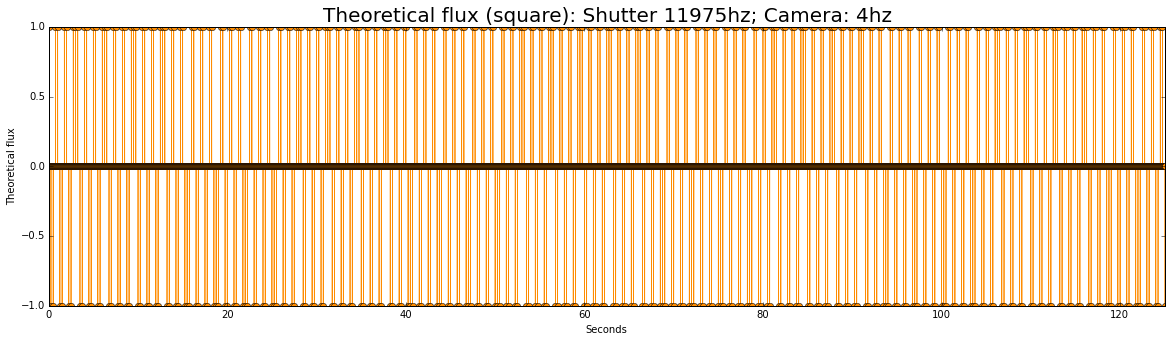

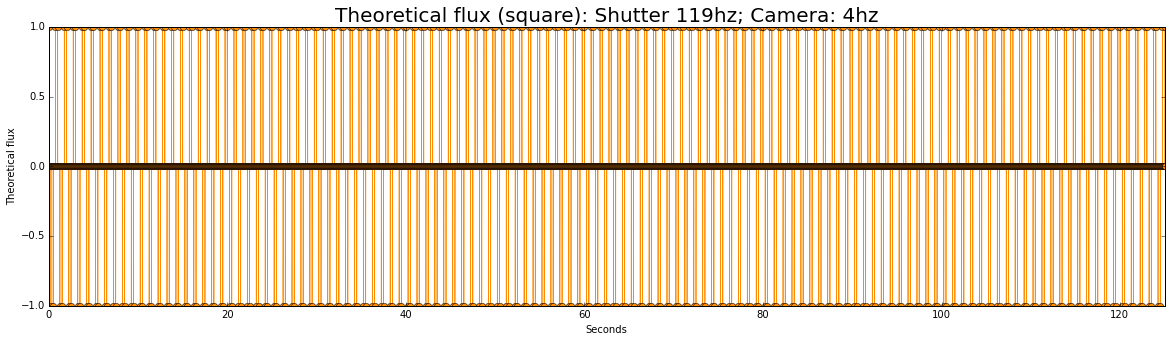

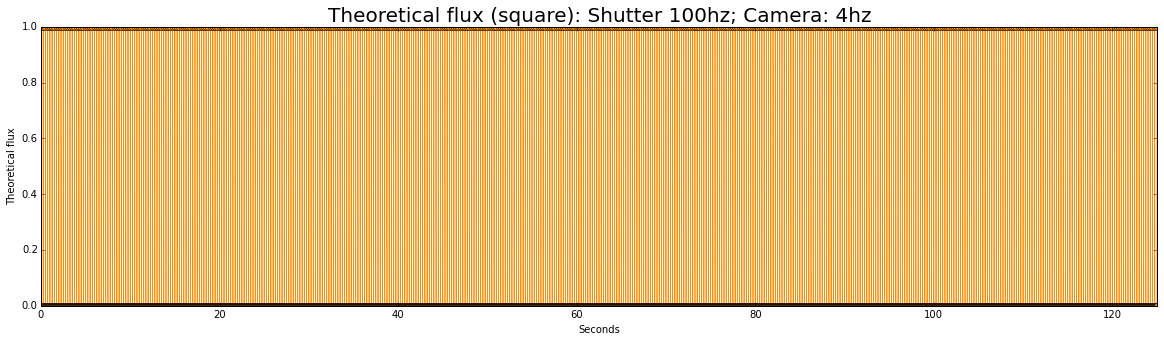

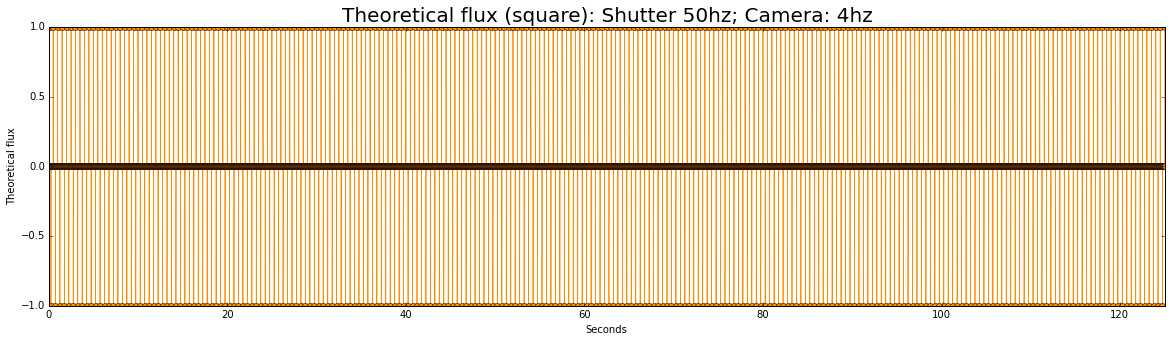

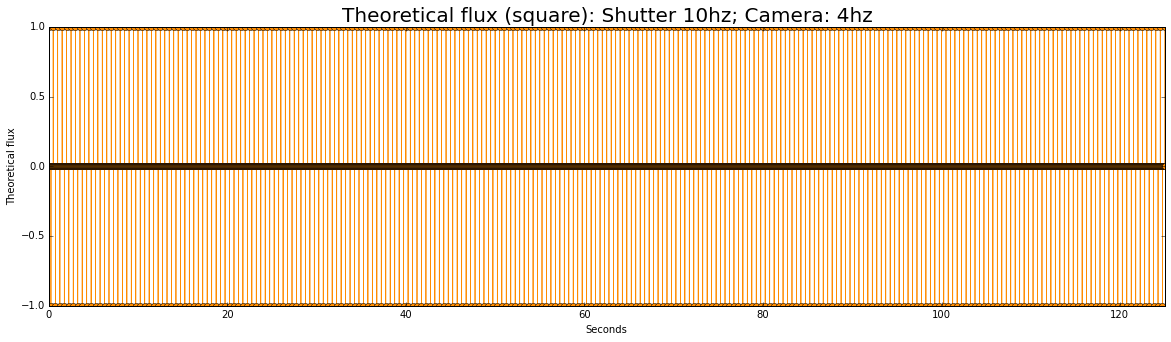

In [45]:
#Plotting the "theoretical" fluxes for camera speed of 4hz
#This flux equals the points in which the camera "meets" the shutter wave

inter_sq4 = {}

for i in shutter:
    inter_sq4[i] = square[i]*cam4
    pl.figure(figsize(20, 5))
    pl.plot(time, inter_sq4[i], '-', color='darkorange', linewidth = 0.75)
    pl.plot(time, inter_sq4[i], 'o', color='darkorange', linewidth = 0.75)
    xlim(0, 125)
    pl.title('Theoretical flux (square): Shutter '+str(i)+'hz; Camera: 4hz', fontsize=20)
    pl.xlabel('Seconds')
    pl.ylabel('Theoretical flux')

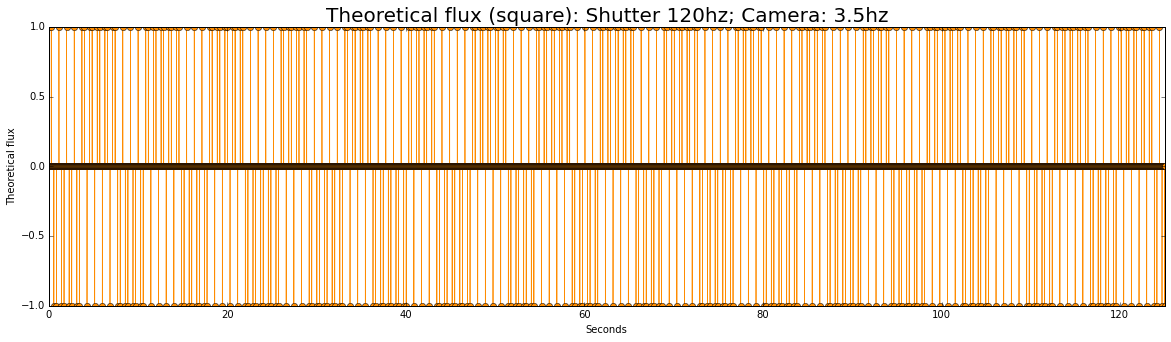

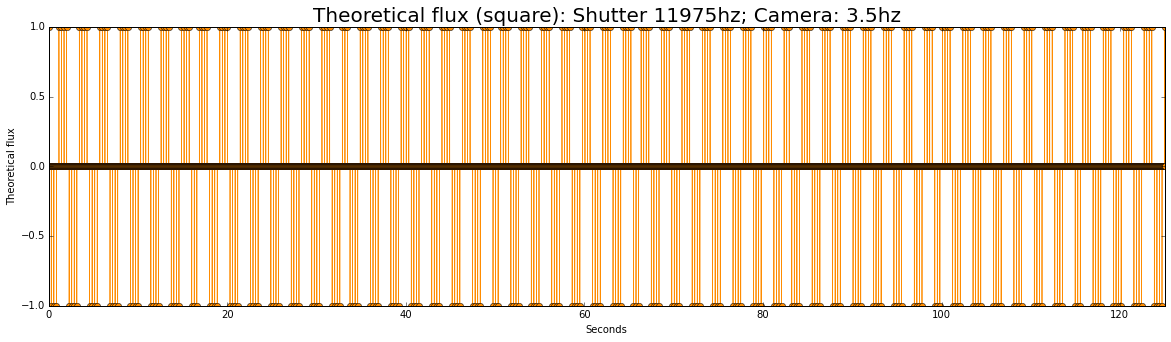

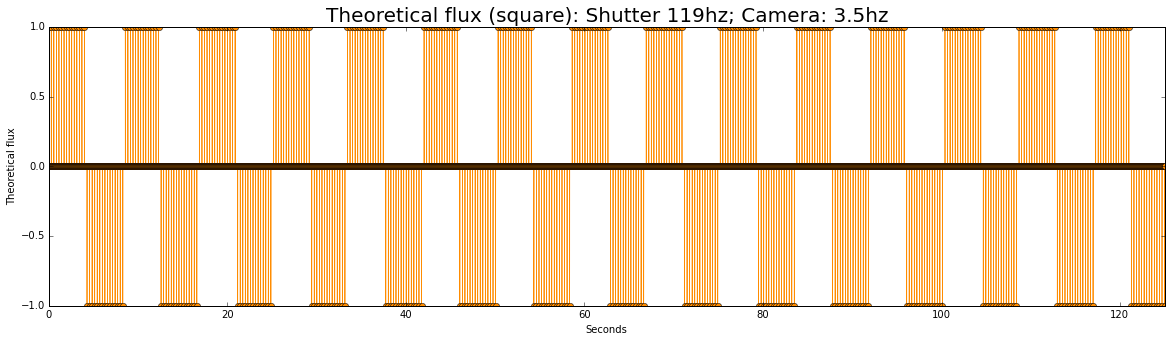

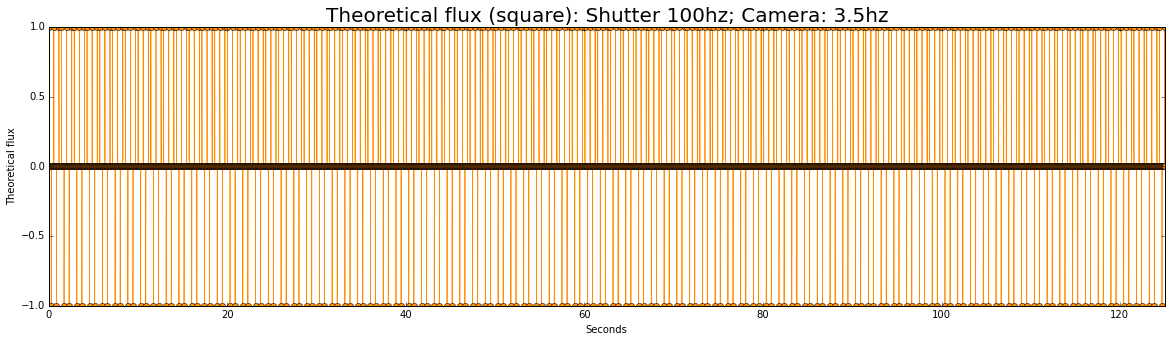

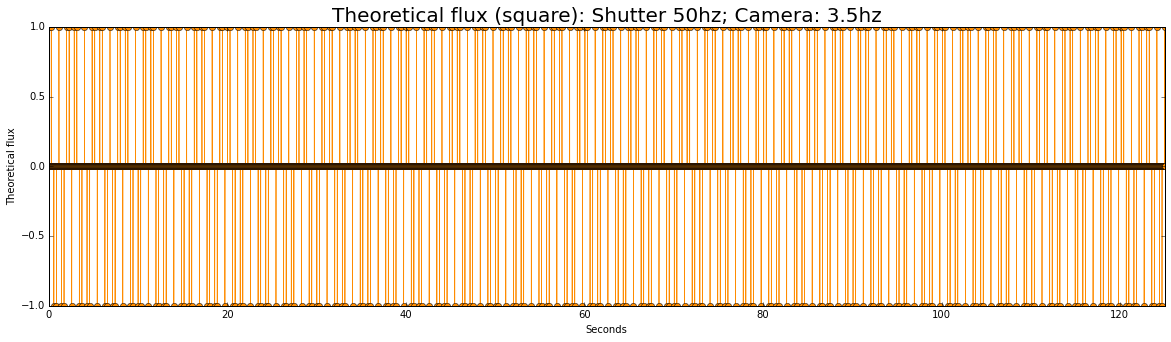

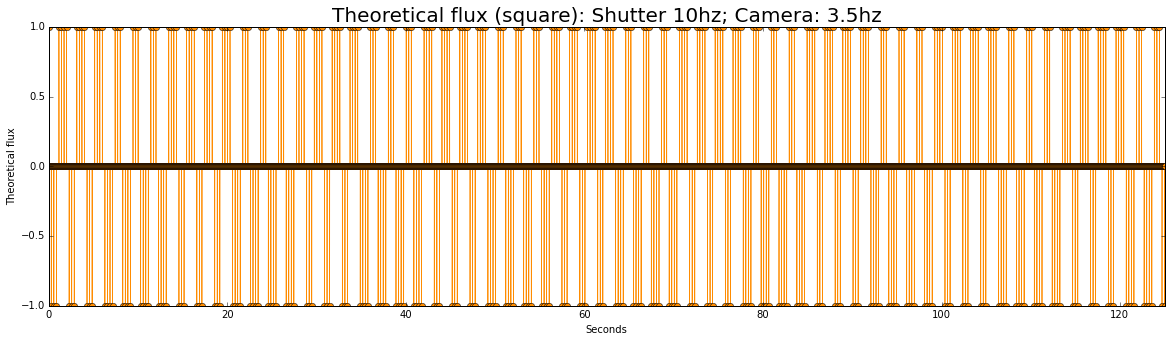

In [46]:
#Plotting the "theoretical" fluxes for camera speed of 3.5hz
#This flux equals the points in which the camera "meets" the shutter wave

inter_sq35 = {}

for i in shutter:
    inter_sq35[i] = square[i]*cam35
    pl.figure(figsize(20, 5))
    pl.plot(time, inter_sq35[i], '-', color='darkorange', linewidth = 0.75)
    pl.plot(time, inter_sq35[i], 'o', color='darkorange', linewidth = 0.75)
    xlim(0, 125)
    pl.title('Theoretical flux (square): Shutter '+str(i)+'hz; Camera: 3.5hz', fontsize=20)
    pl.xlabel('Seconds')
    pl.ylabel('Theoretical flux')